In [1]:
import numpy as np

In [55]:
def loadDataSet():
    """
    Create dataset
    
    Returns:
        posting list and classVec
    """
    postingList = [['my','dog','has','flea','problems','help','please'],
                  ['maybe','not','take','him','to','dog','park','stupid'],
                  ['my','dalmation','is','so','cute','I','love','him'],
                  ['stop','posting','stupid','worthless','grabage'],
                  ['mr','licks','ate','my','steak','how','to','stop','him'],
                  ['quit','buying','worthless','dog','food','stupid']]
    classVec = np.array([0,1,0,1,0,1]) # 1 is absive,0 not
    
    return postingList,classVec

In [56]:
postingList,classVec = loadDataSet()

In [57]:
postingList

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'grabage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [58]:
def set_vocabulary(postingList):
    #整体去重（set/unique/for循环）
    vocabulary = set([])
    for m in postingList:
        vocabulary = vocabulary | set(m)
        
    return list(vocabulary)    #词集
    

In [59]:
vocabulary = set_vocabulary(postingList)
vocabulary

['buying',
 'stupid',
 'is',
 'take',
 'steak',
 'park',
 'dog',
 'problems',
 'stop',
 'love',
 'him',
 'mr',
 'so',
 'worthless',
 'cute',
 'how',
 'dalmation',
 'please',
 'maybe',
 'flea',
 'to',
 'has',
 'grabage',
 'posting',
 'not',
 'my',
 'help',
 'ate',
 'licks',
 'food',
 'quit',
 'I']

In [60]:
def word2vec(vocabulary,postingList):
    m,n = len(postingList),len(vocabulary)
    word_Vec = np.zeros((m,n))
    
    for i in range(m):
        for word in postingList[i]:
            index = vocabulary.index(word)
            word_Vec[i,index] = 1
        return(word_Vec)

In [61]:
words_Vec = word2vec(vocabulary,postingList)
words_Vec

array([[0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
words_Vec.shape

(6, 32)

In [63]:
test_x = [['my','maybe','stupid'],['cute','is'],['quit','buying','worthless']]
test_y = [1,0,0]
test_x = word2vec(vocabulary,test_x)
test_x

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [64]:
#def Model(y):
    #先求先验概率
    #条件概率（拆分样本集）
    #for label in unique_y:
        

In [65]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()  #初始化
clf.fit(words_Vec, classVec)  #训练

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print(clf.predict(test_x))  #预测
#评分
score = clf.score(test_x,test_y)
print(score)

[0 0 0]
0.6666666666666666


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:,:2], data[:,-1]

X, y = create_data()

In [6]:
X.shape

(100, 2)

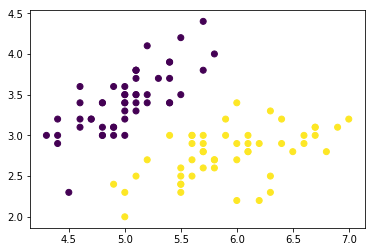

In [7]:
plt.scatter(X[:,0],X[:,1],c=y) 

In [8]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train)

[[4.9 3.6]
 [6.7 3.1]
 [5.1 3.5]
 [5.1 3.4]
 [4.8 3. ]
 [5.4 3.9]
 [7.  3.2]
 [5.6 3. ]
 [4.8 3.4]
 [5.8 4. ]
 [4.9 3.1]
 [5.6 2.7]
 [5.2 4.1]
 [4.8 3.1]
 [5.8 2.7]
 [4.4 3.2]
 [5.2 3.4]
 [6.7 3. ]
 [5.  3.5]
 [5.3 3.7]
 [6.4 3.2]
 [5.7 4.4]
 [5.  2.3]
 [5.4 3.9]
 [6.2 2.2]
 [5.8 2.7]
 [6.9 3.1]
 [6.4 2.9]
 [4.8 3.4]
 [4.6 3.2]
 [5.7 2.9]
 [6.3 3.3]
 [5.  3.4]
 [6.1 2.8]
 [4.3 3. ]
 [5.4 3.4]
 [4.6 3.6]
 [5.5 2.4]
 [5.1 3.8]
 [5.4 3.4]
 [6.1 2.8]
 [5.6 2.9]
 [5.9 3. ]
 [5.6 3. ]
 [6.1 3. ]
 [5.1 3.5]
 [4.9 3. ]
 [4.9 3.1]
 [4.4 3. ]
 [5.  3.4]
 [6.  2.9]
 [5.5 3.5]
 [6.7 3.1]
 [5.1 2.5]
 [6.  3.4]
 [5.  3.2]
 [6.2 2.9]
 [6.3 2.3]
 [5.  3.3]
 [5.8 2.6]
 [4.7 3.2]
 [5.5 2.5]
 [4.8 3. ]
 [5.2 3.5]
 [5.1 3.8]
 [5.5 2.4]
 [6.6 2.9]
 [4.7 3.2]
 [5.  3.6]
 [5.  2. ]
 [4.6 3.4]
 [6.5 2.8]
 [5.5 2.6]
 [6.1 2.9]
 [5.7 3. ]
 [5.7 2.8]
 [5.7 3.8]
 [5.1 3.8]
 [4.9 2.4]
 [5.5 4.2]]


In [10]:
X_train.shape

(80, 2)

In [11]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()  #初始化
clf.fit(X_train, y_train)  #训练

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print(clf.predict(X_test)) 

score = clf.score(X_test,y_test)
print(score)

[1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
0.85


In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
score = clf.score(X_test,y_test)
print(score)

[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
0.95


In [14]:
#from sklearn.datasets import make_classification
    #X, y = make_classification(n_samples=10000,        # 样本个数
                               #n_features=25,          # 特征个数
                               #n_informative=3,        # 有效特征个数
                               #n_redundant=2,          # 冗余特征个数（有效特征的随机组合）
                               #n_repeated=0,           # 重复特征个数（有效特征和冗余特征的随机组合）
                               #n_classes=3,            # 样本类别
                               #n_clusters_per_class=1, # 簇的个数
                               #random_state=0)
                                
#from sklearn.svm import LinearSVC
#from sklearn.datasets import make_classification
#X_test,y_test = make_classification(n_features=4, random_state=0)  ###特征个数
#clf = LinearSVC()
#clf.fit(X_test,y_test)

#print(clf.predict([[0, 0, 0, 0]]))

In [15]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_features=4, random_state=0)
clf = LinearSVC()
clf.fit(X_train, y_train)

print(clf.coef_)

print(clf.intercept_)

print(clf.predict([[0, 0, 0, 0]]))


[[0.08552009 0.3941472  0.49848123 0.37514532]]
[0.28417577]
[1]
